<a href="https://colab.research.google.com/github/Aravinda89/Image-Classificatio-from-Scratch/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install fastai==2.0.15
# !pip install fastai2==0.0.30
# !pip install fastcore==1.0.16
# !pip install fastai --upgrade

! [ -e /content ] && pip install -Uqq fastai 

# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)

In [2]:
from fastai.vision.all import *

In [3]:
from torch import nn

from fastai.callback.hook import summary
from fastai.callback.schedule import fit_one_cycle, lr_find 
from fastai.callback.progress import ProgressCallback

from fastai.data.core import Datasets, DataLoaders, show_at
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import Categorize, GrandparentSplitter, parent_label, ToTensor, IntToFloatTensor, Normalize

from fastai.layers import Flatten
from fastai.learner import Learner

from fastai.metrics import accuracy, CrossEntropyLossFlat

from fastai.vision.augment import CropPad, RandomCrop, PadMode
from fastai.vision.core import PILImageBW
from fastai.vision.utils import get_image_files

In [4]:
# Load data
path = untar_data(URLs.MNIST)

In [9]:
items = get_image_files(path)

In [12]:
items[0]

Path('/root/.fastai/data/mnist_png/training/3/9915.png')

In [17]:
items[:3]

(#3) [Path('/root/.fastai/data/mnist_png/training/3/9915.png'),Path('/root/.fastai/data/mnist_png/training/3/7976.png'),Path('/root/.fastai/data/mnist_png/training/3/50969.png')]

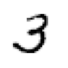

In [14]:
# Visualize image
im = PILImageBW.create(items[0])
im.show()

In [15]:
# Split train/test set
splits = GrandparentSplitter(train_name='training', valid_name='testing')

In [18]:
splits = splits(items)

In [25]:
splits[0][:5]

[0, 1, 2, 3, 4]

In [23]:
len(splits[0])

60000

In [24]:
len(splits[1])

10000

In [26]:
dsrc = Datasets(items, tfms=[[PILImageBW.create], [parent_label, Categorize]], 
                  splits=splits)

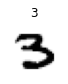

In [30]:
show_at(dsrc.train,5)

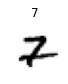

In [33]:
show_at(dsrc.valid,5000)

In [34]:
tfms = [ToTensor(), CropPad(size=34, pad_mode=PadMode.Zeros), RandomCrop(size=28)]

In [36]:
gpu_tfms = [IntToFloatTensor(), Normalize()]

In [37]:
dls = dsrc.dataloaders(bs=128, after_item=tfms, after_batch=gpu_tfms)

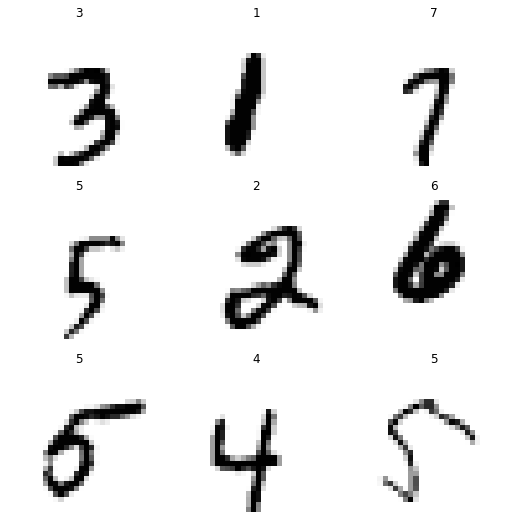

In [41]:
dls.show_batch()

In [42]:
xb, yb = dls.one_batch()

In [43]:
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [44]:
dls.c

10